In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import pandas as pd
import scipy.stats

#the datasets
import sklearn.datasets
import sklearn.cluster

#For better statistical plotting
import seaborn as sns

%matplotlib inline

# Using SVD and PCA to reduce dimensions

We will use the iris dataset that is included in the sklearn package and convert the basic data in it to a dataframe

In [2]:
iris = sklearn.datasets.load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

## Task

 * investigate what iris contains by reading print(iris['DESCR'])
 * and investigate the structure of the data in the dataframe with describe() and by looking at the head of the DataFrame
 * Use the "pairplot" from seaborn to investigate the relation between the data, can you by eye discover correlation between the different type of data?

In [3]:
#print(iris["DESCR"])

In [4]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


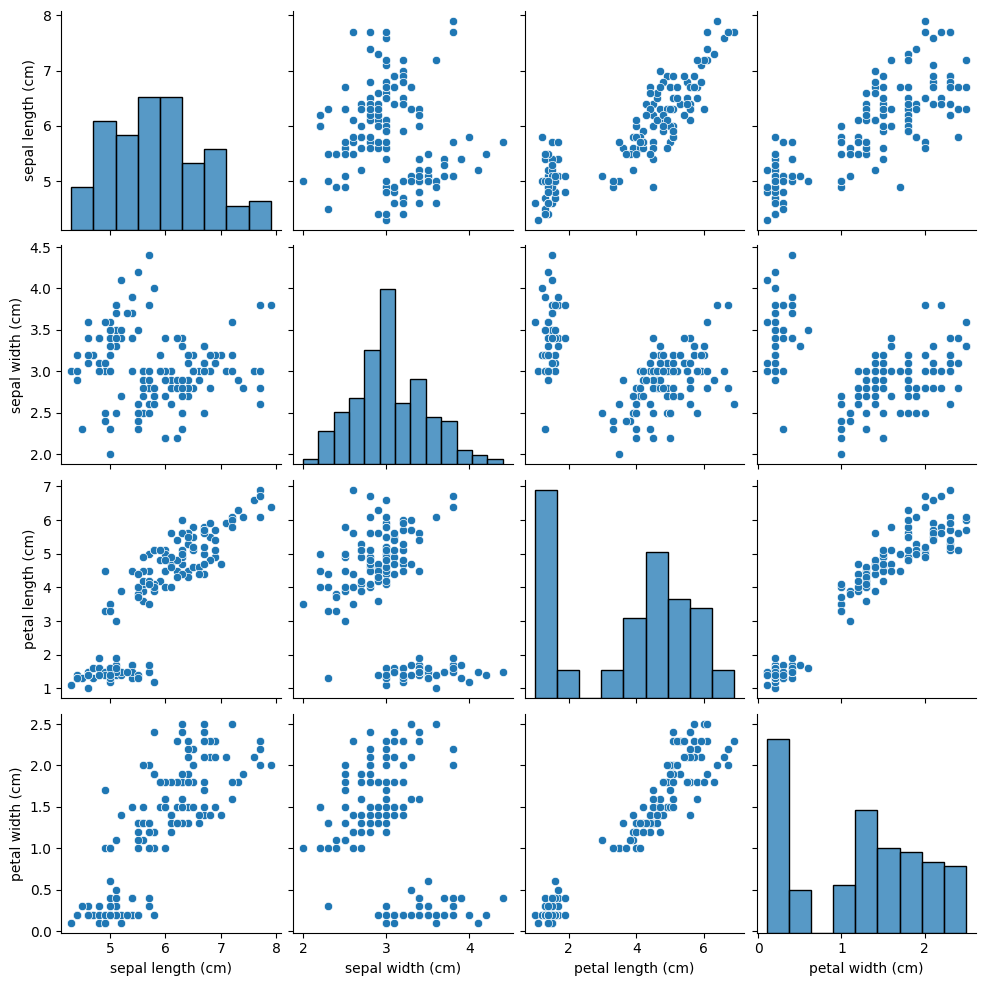

In [5]:
sns.pairplot(df_iris)

The Iris dataset is quite well described in the description. This is a dataset that was used by Fisher in his Linear Discriminant Analysis paper. There are three classes in the dataset, but only two can be seen by looking at the correlation analysis. One is isolated, but the rest two have to be separated by a unsupervised learning method.

In our case, this would be principal component analysis.

**Singular value decomposition factorizes matrix <br>
$X \in mxn$ <br> into <br> $X = U \, * \, \sum \, * \, V^T$ <br>**
**Where:**

* $U \in m×m$ that is called the left singular vectors where each columns is a orthonormal eigenvectors of $XX^T$
* the diagonal matrix  Σ with entries single entries $\in  \mathbb{R}$ that are the non-negative singular values of  X
* and the right singular vectors in Matrix $V \in n×n$ where the columns are the set of orthonormal eigenvectors of  $X^TX$


**The SVD algorithm from the numpy package can calculate this quite efficiently**

In [6]:
#Remove the mean
def recenter(x):
  return x-np.mean(x)

#Centered so the mean is zero
df_iris_c=df_iris.apply(recenter)


In [7]:
U_iris, S_iris, Vt_iris = np.linalg.svd(df_iris, full_matrices=False)
U_iris_c, S_iris_c, Vt_iris_c = np.linalg.svd(df_iris_c, full_matrices=False)


## Task
Plot the cummulative sum of the entries in $S_{iris}^2$ divided by the sum of $S_{iris}^2$ and use the equations 12.8 and 12.9 in the book to label the axis. what is the sum of $S_{iris}^2$? use the answer to label the points in legend of this plot.

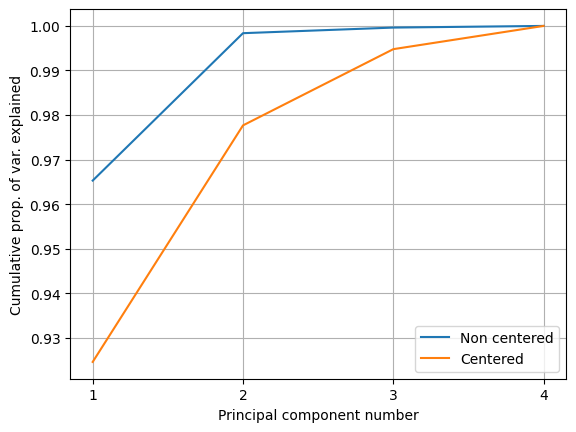

In [8]:
S_iris



plt.plot(np.arange(1,len(S_iris)+1),np.cumsum(S_iris**2)/np.sum(S_iris**2),label = "Non centered")
plt.plot(np.arange(1,len(S_iris_c)+1),np.cumsum(S_iris_c**2)/np.sum(S_iris_c**2),label = "Centered")

plt.xlabel("Principal component number")
plt.ylabel("Cumulative prop. of var. explained")
plt.xticks(np.arange(1,len(S_iris)+1))
plt.legend()
plt.grid()

The variance is mostly contained in the first principal component.
Centering the variable leads to less variance explained by the first principals component.

## Task
**Label the axis in the following plot. It seems as the SVD has selected a vector in which the data is well separated. Try the other vectors and see if you can find other vectors that separate the different flowers.**

The left singular vector matrix is multiplied by S to get the score matrix, so as to plot the principal components.

The figure here can be redrawn depending on which principal components to put on the x or y axis. In the case of this notebook, choosing the first two principal components leads to a good separation of the different classes.

It is however still difficult to differentiate between the versicolor and the virginica species.



Text(0, 0.5, 'sepal width (cm)')

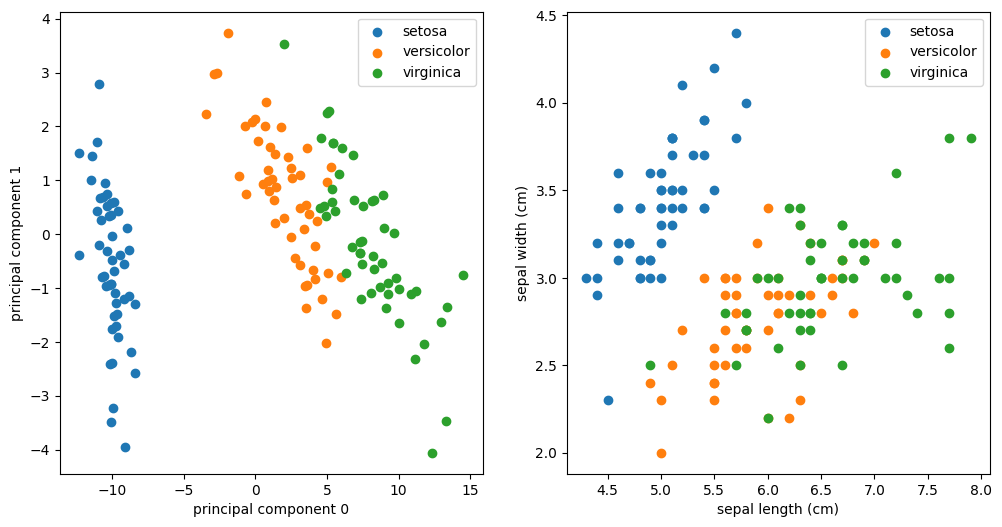

In [9]:
fig,ax=plt.subplots(1,2,figsize=(12,6))
selector=iris['target']

#Select which principal component to choose from
pc_numbers = [0,1]

US = U_iris_c@np.diag(S_iris) #Score matrix

for i in np.unique(selector):
    #Plotting target by target
    selector_name=iris['target_names'][i]
    ax[0].scatter(US[selector==i,pc_numbers[0]],US[selector==i,pc_numbers[1]],label=selector_name)
    ax[1].scatter(df_iris.iloc[selector==i,pc_numbers[0]],df_iris.iloc[selector==i,pc_numbers[1]],label=selector_name)
[ax[a].legend() for a in range(2)]
ax[0].set_xlabel(f"principal component {pc_numbers[0]}")
ax[0].set_ylabel(f"principal component {pc_numbers[1]}")
ax[1].set_xlabel(iris.feature_names[0])
ax[1].set_ylabel(iris.feature_names[1])

In [10]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Illustration of SVD
**To better understand the effect of SVD we will look at a simplified dataset and normalize the data.
Then we will simplify and illustrate the calculation of the projection onto the axis we will rotate the axis system and use the y-value as perpendicular projection $z_i$ in formula 12.5 or figure 12.2 in the book.**

## Task

* **create a new DataFrame with the petal length and width that only contains the varieties 'versicolor' and 'virginica'**
* **centralize each of the axis (subtract the mean) and normalize the scale (divide by the variance)**
* **make a scatterplot between the normalized petal length and width.matrix**



['setosa' 'versicolor' 'virginica']


Text(0.5, 1.0, 'Simplified data set with only two variables and the versicolor and virginica varieties.')

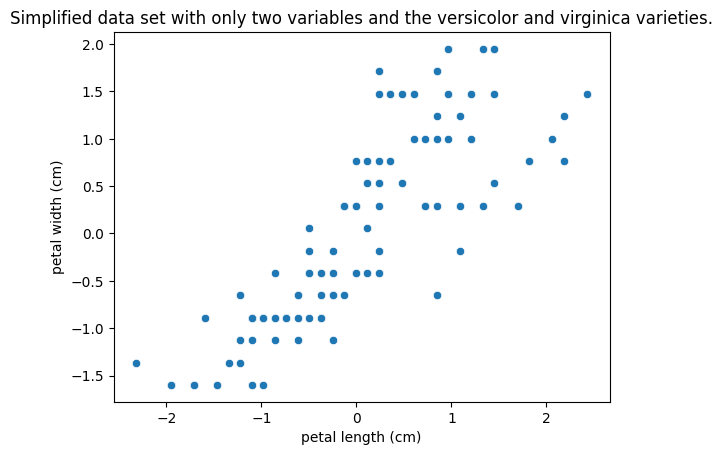

In [11]:
print(iris.target_names)
#The varieties versicolor and virginica have the target number 1 and 2

mask = (iris.target == 1) + (iris.target == 2)

df_iris2 = df_iris[mask]
df_iris2 = df_iris2[['petal length (cm)','petal width (cm)']]
def normalize(x):
    return (x-np.mean(x))/np.std(x)

df_iris2_n = df_iris2.apply(normalize)

sns.scatterplot(df_iris2_n, x = "petal length (cm)", y = "petal width (cm)")
plt.title("Simplified data set with only two variables and the versicolor and virginica varieties.")

## Task

**Create a composite figure with a few plots in each of which you rotate the axis by an angle $\alpha$. The coordinates can be understood as:
  <br> x=r cos($\alpha$) and y=r sin($\alpha$) <br>
  So the rotation of around the center we can express as:<br>
  $$ \begin{bmatrix} x' \\ y' \end{bmatrix} = \begin{bmatrix} cos(\alpha) & sin(\alpha) \\-sin(\alpha) & cos(\alpha)\end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix}$$**

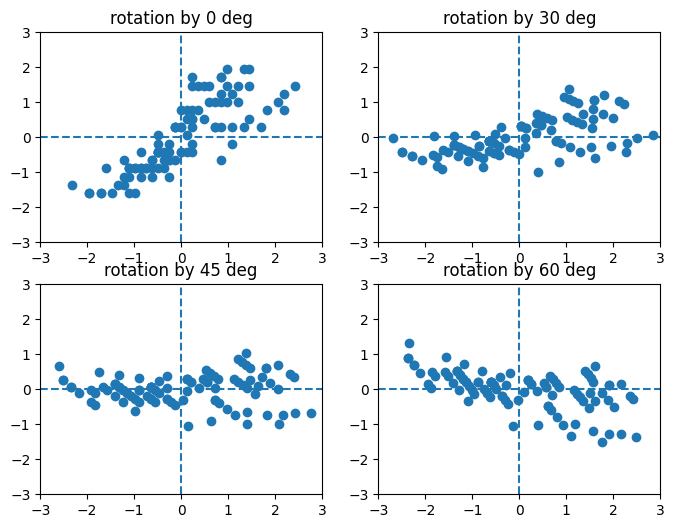

In [12]:
angles = [0 ,np.pi/6 , np.pi/4, np.pi/3]

def rotate(x,y,angle):
    return x*np.cos(angle)+y*np.sin(angle),-x*np.sin(angle)+y*np.cos(angle)



fig ,axs = plt.subplots(ncols = len(angles) // 2, nrows = len(angles) // 2 + len(angles) % 2, figsize = (8,6))
for i , angle in enumerate(angles):
    x,y = rotate(df_iris2_n["petal length (cm)"],df_iris2_n["petal width (cm)"],angle)
    row = i // 2
    col = i % 2
    axs[row,col].scatter(x,y)
    axs[row,col].set_xlim(-3,3)
    axs[row,col].set_ylim(-3,3)
    axs[row,col].axvline(0,linestyle = '--')
    axs[row,col].axhline(0,linestyle = '--')
    axs[row,col].set_title(f"rotation by {angle*180/np.pi:.0f} deg")



Doing a rotation of 45 degrees seems to fit the data quite well, as most of the variance is then along the x-axis.

## Task

The y-value of each point corresponds to the $z_i$ value or the value that is not explained by the vector we assume here that for the perfect vector the euclidian distance is the same as the y-value. <br> The sum of the squared values corresponds to the variance that is not explained by the vector and that is to be minimized. The x-values (after rotation) correspond to the value of the variance that is explained by the first independent vector. For an $\alpha$ from 0 to 360 plot the sum of the squared y-values against the angle. With matplotlib this can e.g. be achieved with:

```
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.plot(alpha, r)
```

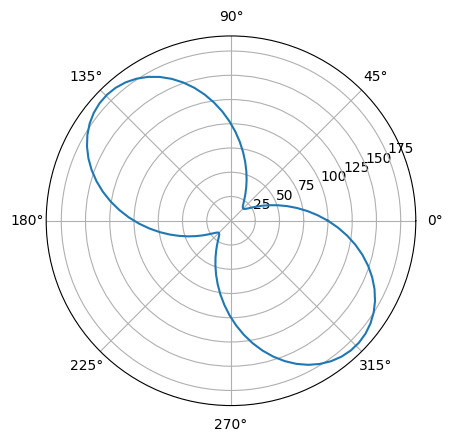

In [13]:
alpha = np.linspace(0,2*np.pi,100)
r = np.zeros(100)
for i,angle in enumerate(alpha):
    x,y = rotate(df_iris2_n["petal length (cm)"],df_iris2_n["petal width (cm)"],angle)
    r[i] = np.sum(y**2)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(alpha, r)

In that example, a rotation of approximately 45 degree allows for the x vector to explain the most of the variance.

## Task

Finally compare if the minimum values of this plot and the vector that you get back for the a new SVD are comparable.

In [14]:
U_iris2, S_iris2, Vt_iris2 = np.linalg.svd(df_iris2_n, full_matrices=False)


y_svd = U_iris2@np.diag(S_iris2)[:,1]

print(f'Variance calculated by the SVD: {np.sum(y_svd**2)}')
print(f'Minimal variance calculated with rotations {np.min(r)}')

Variance calculated by the SVD: 17.66524010769018
Minimal variance calculated with rotations 17.675603775438766


# Limitations of SVD/PCA
It is a fair assumption to consider PCA a non normallized version of SVD (check the math) however there are other that this part of the lab shall reveal. SVD is often used to look at measured (discrete) data and extract the normalized vectors from it. Here we shall first construct known data and then try to retrieve the data in it. We use for this we construct a sequence of non overlapping spectra of different species and look at the progression of the kinetic:<be>
WE excite the ground state of the same (excitation is before the space of observation) and then see the components A, B, C decay back into the ground state<br>
GS -> A-> B-> C -> GS

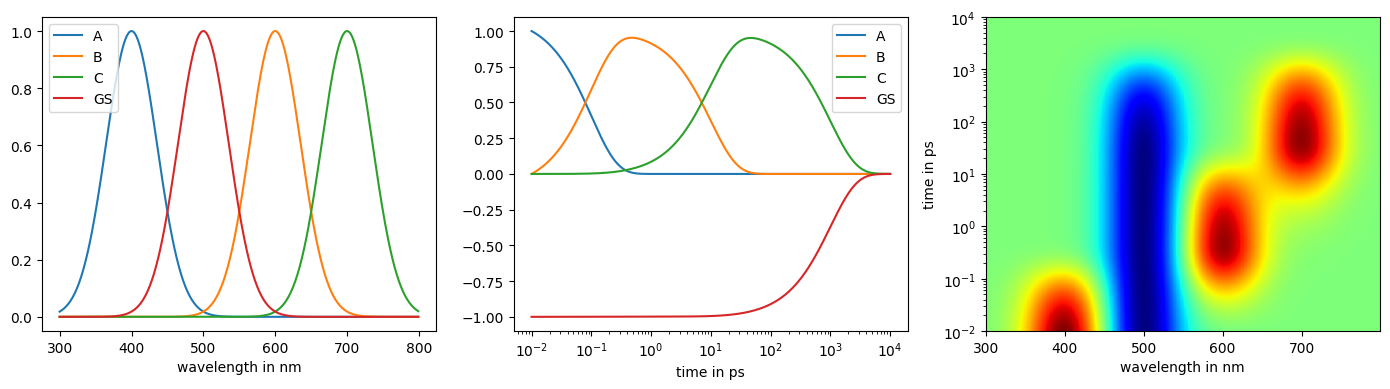

In [15]:
#| echo: false


gauss = lambda x,mu,sigma=50: np.exp(-((x-mu)/sigma)**2)
x=np.arange(300,800,1)
spectra=pd.DataFrame({'A':gauss(x=x,mu=400),'B':gauss(x=x,mu=600),'C':gauss(x=x,mu=700),'GS':gauss(x=x,mu=500)},index=x)
spectra.index.name='wavelength in nm'
time=np.logspace(-2,4,int(1e4))
c=np.zeros((len(time),3))
rates=[1/0.1,1/10,1/1000]
c[0,0]=1
for i,t in enumerate(time[1:]):
    dc=c[i,:]
    timestep=t-time[i]
    dc[0]+=-rates[0]*timestep*dc[0]
    dc[1]+=rates[0]*timestep*dc[0]-rates[1]*timestep*dc[1]
    dc[2]+=rates[1]*timestep*dc[1]-rates[2]*timestep*dc[2]
    dc[dc<0]=0
    c[i+1,:]=dc
c=pd.DataFrame(c,index=time,columns=['A','B','C'])
c['GS']=-1*c.sum(axis=1)
c.index.name='time in ps'
data=0
for i,col in enumerate(c.columns):
    A,B=np.meshgrid(c.loc[:,col].values,spectra.loc[:,col].values)
    C=pd.DataFrame((A*B).T,index=c.index)
    if i==0: data=C
    else: data=data+C
data.columns=spectra.index.values

fig,ax=plt.subplots(1,3,figsize=(14,4))
spectra.plot(ax=ax[0])
c.plot(ax=ax[1])
ax[1].set_xscale('log')
X, Y = np.meshgrid(data.columns.values.astype(float), data.index.values.astype(float))
ax[2].pcolormesh(X,Y,data.values,cmap='jet')
ax[2].set_yscale('log')
ax[2].set_xlabel(spectra.index.name)
ax[2].set_ylabel(c.index.name)
fig.tight_layout()

## Task
Use SVD on the DataFrame "data" just generated, plot the plot the spectra, the kinetics and the strength of the first 5 singular vectors in this data. why are they different? Any idea how you would fix that?<br>Hint: Check that you have the right orientation of the matrics by comparing the dimensions to the DataFrame

In [16]:
data

U_data, S_data, Vt_data = np.linalg.svd(data, full_matrices=False)

print(U_data.shape)
print(S_data.shape)
print(Vt_data.shape)


(10000, 500)
(500,)
(500, 500)


Despite the dataset being formed with 4 groups, there are only three singular values that stand out.

In [17]:
print(S_data[:5])
#Only the first 3 singulars are big, the rests are smallish

[7.64449827e+02 3.25101502e+02 2.58857098e+02 5.83353736e-13
 1.46091131e-13]


Plotting the score of the first 5 singular vectors show that we extract the ground state evolution in the blue line, but the orange line and green line consists of a mix of the other three states. It is however possible to see visually that there are three points were the score values hit a extremum, indicative that the three other states are still present in the data, just not extracted correctly.

Another approach than the SVD may be more efficient here.

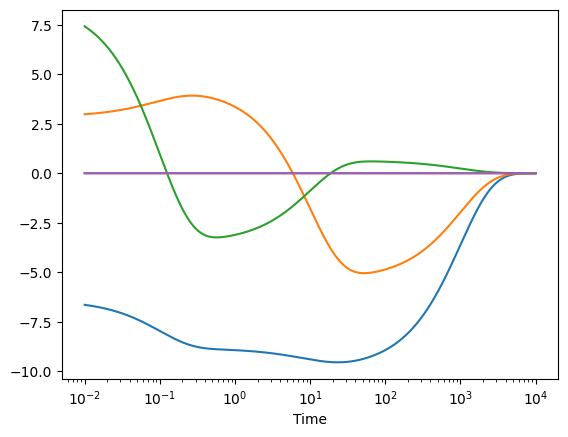

In [18]:
plt.plot(time,U_data[:,0]*S_data[0])
plt.plot(time,U_data[:,1]*S_data[1])
plt.plot(time,U_data[:,2]*S_data[2])
plt.plot(time,U_data[:,3]*S_data[3])
plt.plot(time,U_data[:,4]*S_data[4])
plt.xlabel("Time")
plt.xscale('log')
#Time evolution



# Clustering

In this lab we will look into both K-mean clustering and hierachical clustering. <br>
please use the **df_iris** from above for these plots.

## K-Mean clustering

**Use the below code to create a plot with 5 rows and 5 columns. Now use sklearn.cluster.KMeans to calculate a new "selector" that is separating the different flower types. for row 2-5 change the number of clusters you calculate from [1,2,3,4,5] and the numbers of initial random states you test [1,2,5,20]. Closely investigate the plots and formulate briefely where and when they differ.**

**Now use the same code but only give it two of the 4 columns (e.g. the first two) and observe the difference. Can you formulate it?**
  

In the following plots, we see that the k-mean algorithm always converge to the same centroids for 2 clusters. For 5 clusters, there are times where the random initialization process leads to different results, in particular in the groups in the lower left portion of the graph. Sometimes, the algorithm finds only one group, sometimes two. The 20 clusters scenario makes for some really poor fits, which are completely random and worthless, as this is way more clusters than there are in reality.


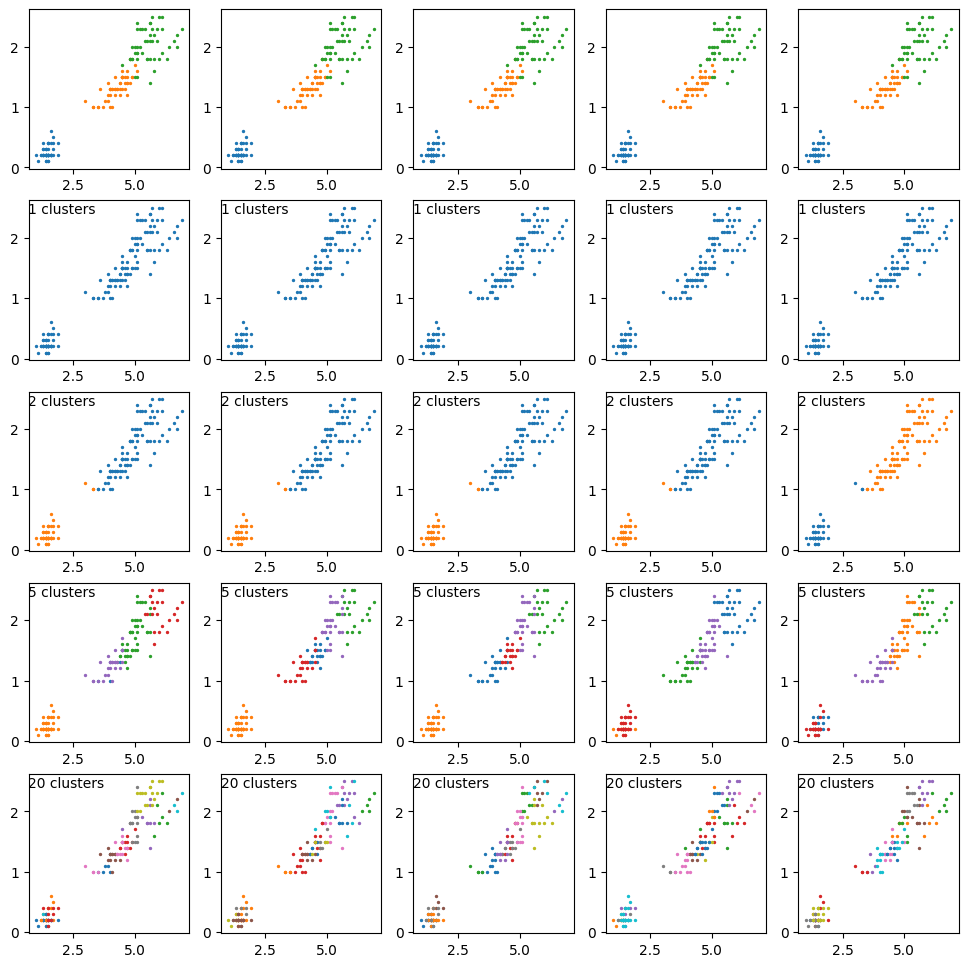

In [19]:
from itertools import product
X = iris["data"]

def plot_kmeans(X):
  np.random.seed(12345)  # we start with the same random number to
  fig,ax=plt.subplots(5,5,figsize=(12,12))
  #plot the selection as given in the data
  selector_given=iris['target']
  for i in np.unique(selector_given):
      selector_name=iris['target_names'][i]
      for j in range(5):
          ax[0,j].scatter(df_iris.iloc[selector_given==i,2],df_iris.iloc[selector_given==i,3],label=selector_name,s=2)

  #code here
  clusters = [1,2,3,4,5]
  init_random_state = [1,2,5,20]
  k_mean_list = []

  j = 0
  for n_cluster , n_rnd_state in product(init_random_state,clusters):
      #Inner loop: number of random state, Outer: number of cluster
      k_mean = sklearn.cluster.KMeans(n_clusters=n_cluster,random_state=n_rnd_state).fit(X)
      k_mean_list.append(k_mean)
      selector = k_mean.labels_
      for i in np.unique(selector):
        ax[j//5+1,j%5].scatter(df_iris.iloc[selector==i,2],df_iris.iloc[selector==i,3],label=i,s=2)
      ax[j//5+1,j%5].text(0.7,2.4,f"{n_cluster} clusters")
      j+= 1

plot_kmeans(X)

Fitting to the reduced dataset with only two columns, the results are more or less the same for two clusters. For 5 clusters, however, the results are very sensitive to a random initialization. This is explainable in the sense that the algorithm has less data to work with.

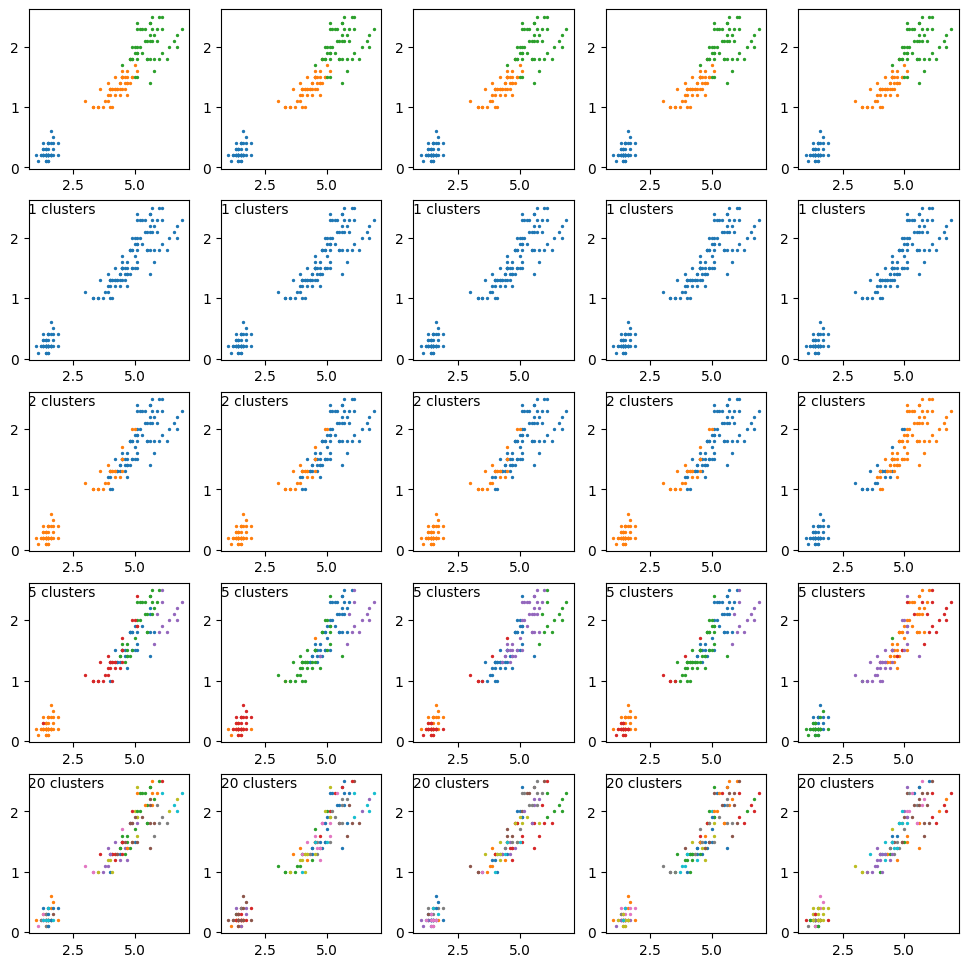

In [20]:
X = iris["data"][:,:2]
plot_kmeans(X)